# LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc

# INPUT TICKER

In [4]:
ticker = input('Type in the ticker of the stock: ')

Type in the ticker of the stock: AMZN


# INPUT START & END DATES TO DOWNLOAD DATA

In [71]:
start_date = input('Start date (YYYY-MM-DD): ')
end_date = input('End date (YYYY-MM-DD): ')

Start date (YYYY-MM-DD): 2021-01-01
End date (YYYY-MM-DD): 2022-12-31


# DOWNLOADING DATA

In [72]:
data = yf.download(ticker,start_date,end_date)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,163.500000,163.600006,157.201004,159.331497,159.331497,88228000
2021-01-05,158.300507,161.169006,158.253006,160.925507,160.925507,53110000
2021-01-06,157.324005,159.875504,156.557999,156.919006,156.919006,87896000
2021-01-07,157.850006,160.427002,157.750000,158.108002,158.108002,70290000
2021-01-08,159.000000,159.531998,157.110001,159.134995,159.134995,70754000
...,...,...,...,...,...,...
2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700
2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000
2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600


# OHLC PLOT

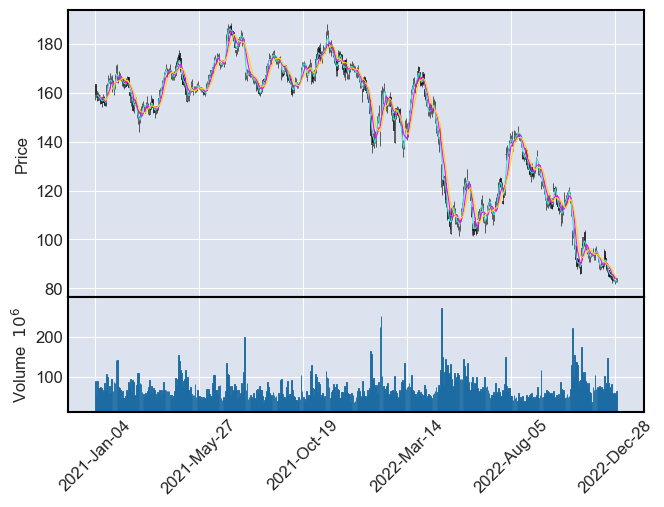

In [73]:
mpf.plot(data,type='candle', volume=True, mav=(3,6,9))

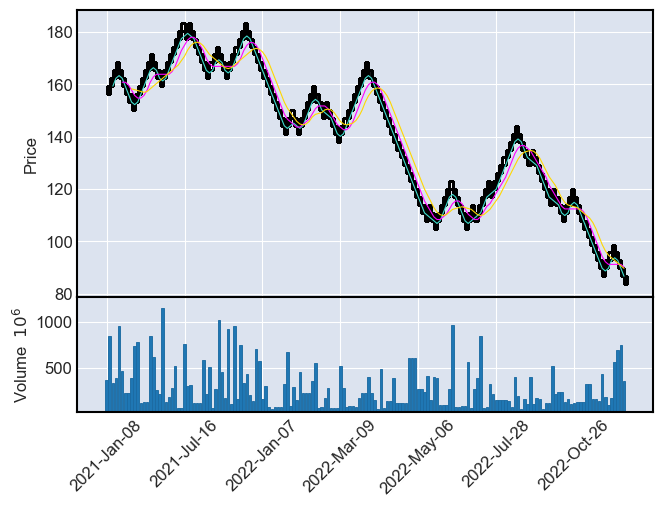

In [74]:
mpf.plot(data,type='renko', volume=True, mav=(3,6,9))

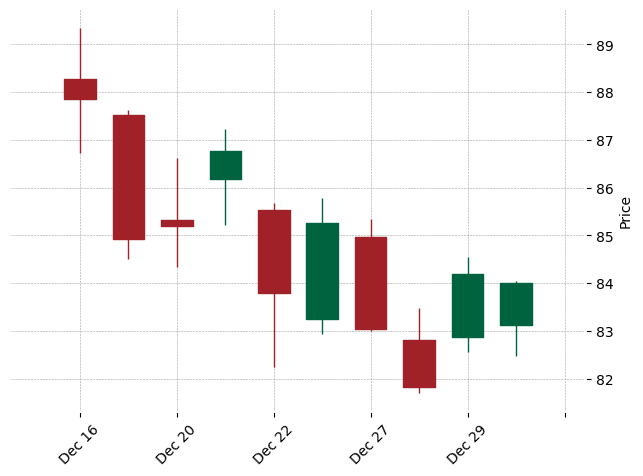

In [75]:
mpf.plot(data.iloc[-10:],type='candle', style='charles')

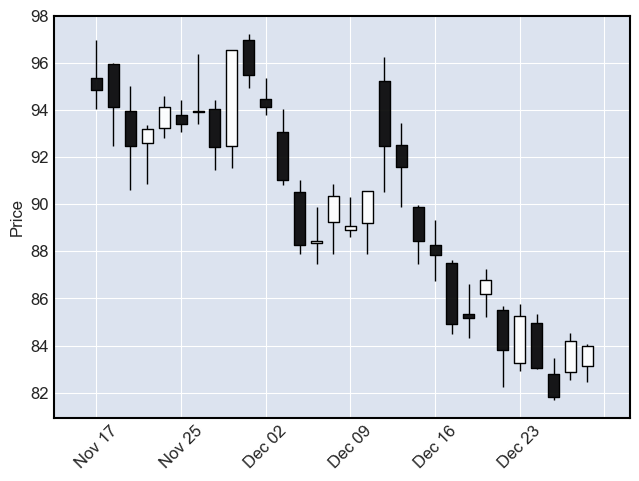

In [76]:
mpf.plot(data[-30:],type='candle')

In [77]:
df = data[-200:]
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-17,152.640503,157.498505,152.139999,157.238998,157.238998,72934000
2022-03-18,156.813004,161.593994,156.011002,161.250504,161.250504,102962000
2022-03-21,161.121002,163.084000,159.552994,161.491501,161.491501,66538000
2022-03-22,161.805496,166.167007,161.699005,164.889008,164.889008,64086000
2022-03-23,163.705002,166.369995,162.686996,163.408005,163.408005,55812000
...,...,...,...,...,...,...
2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700
2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000
2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600


In [78]:
def is_support(df,i):
  cond1 = df['Low'][i] < df['Low'][i-1]
  cond2 = df['Low'][i] < df['Low'][i+1]
  cond3 = df['Low'][i-1] < df['Low'][i-2]
  cond4 = df['Low'][i+1] < df['Low'][i+2]
  return (cond1 and cond2 and cond3 and cond4)

In [79]:
def is_resistance(df,i):
  cond1 = df['High'][i] > df['High'][i-1]
  cond2 = df['High'][i] > df['High'][i+1]
  cond3 = df['High'][i-1] > df['High'][i-2]
  cond4 = df['High'][i+1] > df['High'][i+2]
  return (cond1 and cond2 and cond3 and cond4)

In [80]:
df['Suport'] = np.nan

C:\Users\bviei\AppData\Local\Temp\ipykernel_16252\1715359376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Suport'] = np.nan


In [81]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Suport
Date,,,,,,,
2022-03-17,152.640503,157.498505,152.139999,157.238998,157.238998,72934000,NaN
2022-03-18,156.813004,161.593994,156.011002,161.250504,161.250504,102962000,NaN
2022-03-21,161.121002,163.084000,159.552994,161.491501,161.491501,66538000,NaN
2022-03-22,161.805496,166.167007,161.699005,164.889008,164.889008,64086000,NaN
2022-03-23,163.705002,166.369995,162.686996,163.408005,163.408005,55812000,NaN


In [82]:
for i in range(2, len(df) - 2):
  if is_support(df, i):
    df['Suport'].iloc[i] = df['Low'][i]
  else:
    df['Suport'].iloc[i] = False

C:\Users\bviei\AppData\Local\Temp\ipykernel_16252\3679670775.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Suport'].iloc[i] = False
C:\Users\bviei\AppData\Local\Temp\ipykernel_16252\3679670775.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Suport'].iloc[i] = df['Low'][i]


In [83]:
df.tail(30)

,Open,High,Low,Close,Adj Close,Volume,Suport
Date,,,,,,,
2022-11-17,95.370003,96.970001,94.029999,94.849998,94.849998,82617900,False
2022-11-18,95.949997,95.989998,92.480003,94.139999,94.139999,72428200,False
2022-11-21,93.970001,95.019997,90.589996,92.459999,92.459999,84330300,90.589996
2022-11-22,92.620003,93.349998,90.870003,93.199997,93.199997,62192000,False
2022-11-23,93.239998,94.580002,92.830002,94.129997,94.129997,59414700,False
2022-11-25,93.790001,94.430000,93.070000,93.410004,93.410004,35088600,False
2022-11-28,93.930000,96.400002,93.430000,93.949997,93.949997,74943100,False
2022-11-29,94.040001,94.410004,91.440002,92.419998,92.419998,65567300,False
2022-11-30,92.470001,96.540001,91.529999,96.540001,96.540001,102805800,False


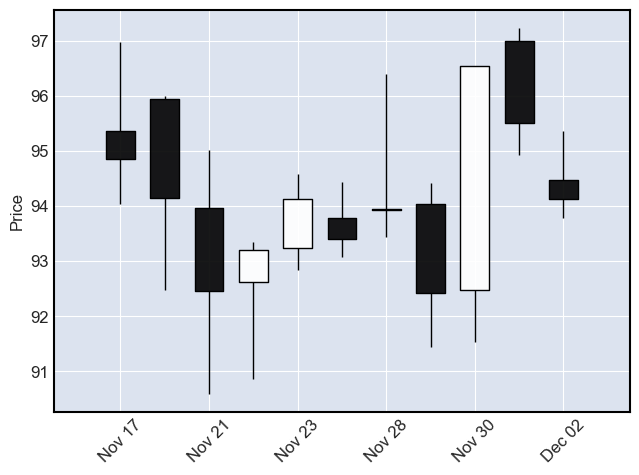

In [84]:
mpf.plot(df[-30:-19],type='candle')

In [85]:
df['Resistance'] = np.nan

C:\Users\bviei\AppData\Local\Temp\ipykernel_16252\1203017055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Resistance'] = np.nan


In [86]:
for i in range(2, df.shape[0] - 2):
  if is_resistance(df, i):
    df['Resistance'].iloc[i] = df['High'][i]
  else:
    df['Resistance'].iloc[i] = False

C:\Users\bviei\AppData\Local\Temp\ipykernel_16252\1424899198.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Resistance'].iloc[i] = False
C:\Users\bviei\AppData\Local\Temp\ipykernel_16252\1424899198.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Resistance'].iloc[i] = df['High'][i]


In [87]:
df[(df['Suport']!=False) | (df['Resistance']!=False)].tail(10)

,Open,High,Low,Close,Adj Close,Volume,Suport,Resistance
Date,,,,,,,,
2022-08-16,143.910004,146.570007,142.000000,144.779999,144.779999,59102900,False,146.570007
2022-09-12,134.100006,136.490005,134.000000,136.449997,136.449997,53826900,False,136.490005
2022-10-25,119.650002,121.320000,118.949997,120.599998,120.599998,50934600,False,121.32
2022-11-09,89.470001,89.480003,85.870003,86.139999,86.139999,90796200,85.870003,False
2022-11-21,93.970001,95.019997,90.589996,92.459999,92.459999,84330300,90.589996,False
2022-12-01,96.989998,97.230003,94.919998,95.500000,95.500000,68488000,False,97.230003
2022-12-07,88.339996,89.889999,87.480003,88.459999,88.459999,68086900,87.480003,False
2022-12-13,95.230003,96.250000,90.519997,92.489998,92.489998,100212000,False,96.25
2022-12-29,82.870003,84.550003,82.550003,84.180000,84.180000,54995900,NaN,NaN


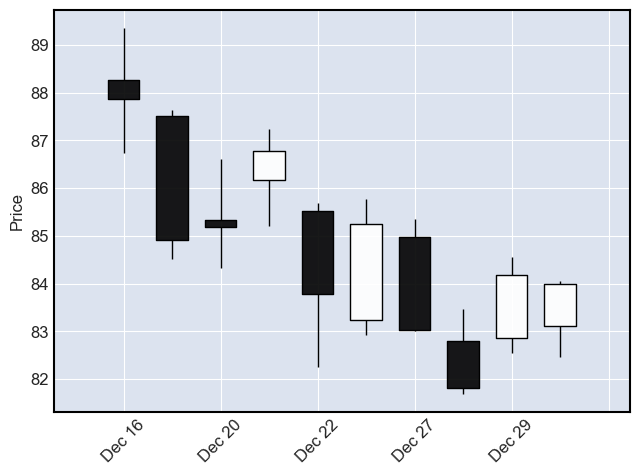

In [88]:
mpf.plot(df[-10:],type='candle')

In [89]:
levels = []
level_types = []
for i in range(2, df.shape[0] - 2):

  if is_support(df, i):
    levels.append((i, df['Low'][i].round(2)))
    level_types.append('Support')

  elif is_resistance(df, i):
    levels.append((i, df['High'][i].round(2)))
    level_types.append('Resistance')

In [90]:
levels[0:10]

[(8, 170.83),
 (11, 162.32),
 (19, 156.02),
 (39, 102.41),
 (42, 115.8),
 (47, 101.26),
 (69, 117.98),
 (72, 102.52),
 (76, 116.99),
 (80, 106.01)]

In [91]:
level_types[0:10]

['Resistance',
 'Support',
 'Resistance',
 'Support',
 'Resistance',
 'Support',
 'Resistance',
 'Support',
 'Resistance',
 'Support']

In [92]:
from mplfinance.original_flavor import candlestick_ohlc

In [93]:
df = df.iloc[:,0:4]
df.insert(0, column='Date', value=df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)

In [94]:
def plot_levels():
  fig, ax = plt.subplots()
  candlestick_ohlc(ax, df.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

  for level, level_type in zip(levels, level_types):
    plt.hlines(level[1],
               xmin = df.index[level[0]],
               xmax = max(df.index),
               colors = 'blue')
    plt.text(df.index[level[0]], level[1], (str(level_type) + ': ' + str(level[1]) + ' '), ha='right', va='center', fontweight='bold', fontsize='x-small')
    plt.title('Support and Resistance levels for ' + ticker, fontsize=12, fontweight='bold')
    fig.show()

C:\Users\bviei\AppData\Local\Temp\ipykernel_16252\1711139306.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


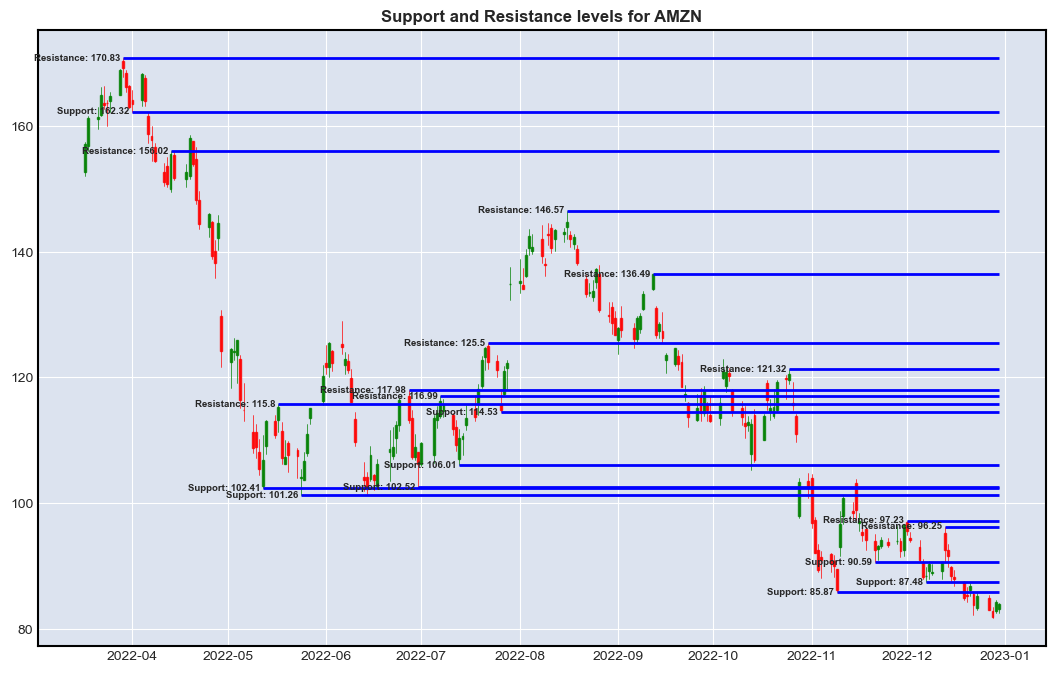

In [95]:
plt.rcParams['figure.figsize'] = [13, 8]
plt.rc('font', size=10)
plot_levels()

In [96]:
def is_far_from_level(value, levels, df):
  ave =  np.mean(df['High'] - df['Low'])
  return np.sum([abs(value-level)<ave for _,level in levels])==0

In [97]:
levels = []
level_types = []

for i in range(2, df.shape[0] - 2):

  if is_support(df, i):
    low = df['Low'][i]
    if is_far_from_level(low, levels, df):
      levels.append((i, df['Low'][i].round(2)))
      level_types.append('Support')

  elif is_resistance(df, i):
    high = df['High'][i]
    if is_far_from_level(high, levels, df):
      levels.append((i, df['High'][i].round(2)))
      level_types.append('Resistance')

C:\Users\bviei\AppData\Local\Temp\ipykernel_16252\4191278186.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


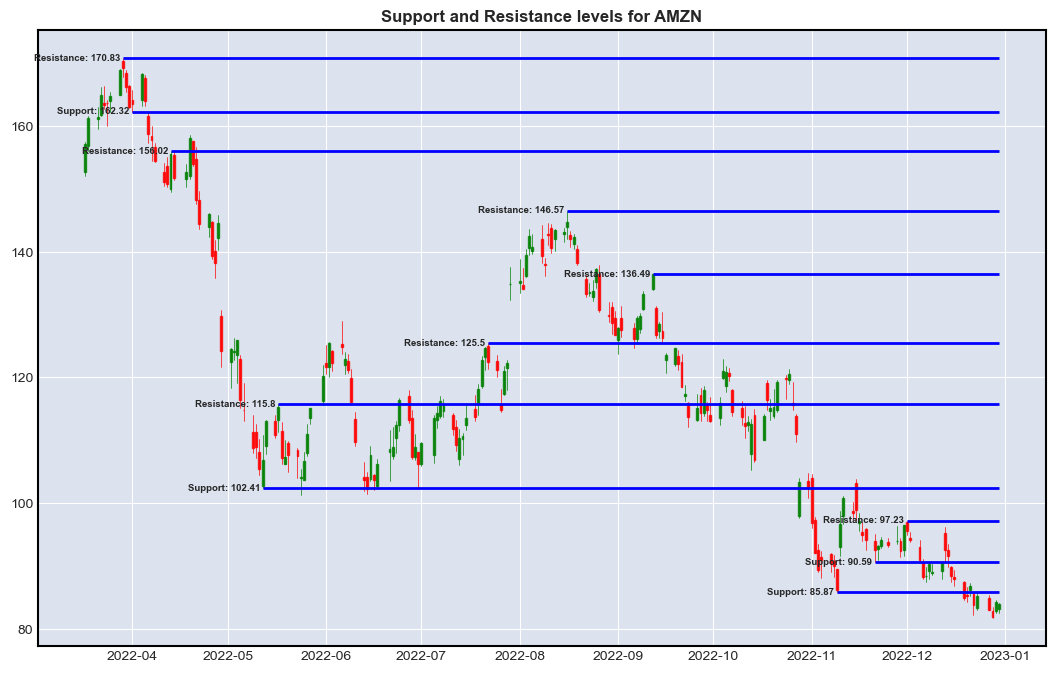

In [98]:
def plot_levels():
  fig, ax = plt.subplots()
  candlestick_ohlc(ax, df.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

  for level, level_type in zip(levels, level_types):
    plt.hlines(level[1],
               xmin = df.index[level[0]],
               xmax = max(df.index),
               colors = 'blue')
    plt.text(df.index[level[0]], level[1], (str(level_type) + ': ' + str(level[1]) + ' '), ha='right', va='center', fontweight='bold', fontsize='x-small')
    plt.title('Support and Resistance levels for ' + ticker, fontsize=12, fontweight='bold')
    fig.show()

plot_levels()